# Laboratory 8 - Text Analysis

Reference: https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com 

## Instructions

1. Clean the `review` column of the dataset by doing the following:
 - Remove stopwords
 - Remove special character (including numbers 0-9)
 - Lowercasing the text
 - Lemmatization

2. Split the dataframe into three dataframes by review.
 - First table are data with `rating` from 1 to 4.
 - Second table are data with `rating` from 5 to 7.
 - Third table are data with `rating` from 8 to 10.

3. On each table, make the following text analysis on the data
 - Word Count (unigram). Consider only the Top 15 words
 - Word Cloud. Consider the top 100 words, and adjust the font size of the text by its word count

4. On each table, perform a sentiment analysis using Text blob https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
 - Create a new column called `polarity` to record the sentiments per data
 - Run a sentiment analysis per data in the `review` column. Record the sentiment analysis score
 - Make a historgram of the polarity score.
 
5. Insights
 - Write down your insights

In [1]:
NAME = "CONCHA, ALTHEA GRACE"
COLLABORATORS = "CRUZ, GEORGE EMANUEL, SALVADOR, ASHLY CHANNEL"

# Import Modules

In [2]:
# You may add as much modules as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import textblob
import nltk

# added modules: teya
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from textblob import TextBlob

# Data Loading

In [3]:
df = pd.read_csv("drugsComTrain_raw.tsv", delimiter = '\t')

df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


# 1. Clean the review column

In [4]:
# Add your codes here
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(remove_stopwords)
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"`` side effect , take combination bystolic 5 m...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,`` son halfway fourth week intuniv . became co...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"`` used take another oral contraceptive , 21 p...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,`` first time using form birth control . & # 0...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,`` suboxone completely turned life around . fe...,9.0,"November 27, 2016",37


By this part, we remove the stopwords. Words like 'a', 'the' 'is', basically words without any meaning to it, as we only need words with actual substance. This makes it easier for the computer to analyze as well. This by far takes the longest to process, making this activity tedious.

In [5]:
import re

def remove_special_chars(text):
    # Remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

df['review'] = df['review'].apply(remove_special_chars)
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fi...,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became conce...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill c...,5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,first time using form birth control glad...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel ...,9.0,"November 27, 2016",37


We then remove all special characters and numbers from the review column, as that's not really something we can extract value from.

In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['review'] = df['review'].apply(lemmatize_text)

df.head()


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,first time using form birth control glad went ...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0,"November 27, 2016",37


lastly, we reduce the words into their base forms.

# 2. Table splittng

In [7]:
# Add your codes here
bad = df[(df['rating'] >= 1) & (df['rating'] <= 4)]
meh = df[(df['rating'] >= 5) & (df['rating'] <= 7)]
good = df[(df['rating'] >= 8) & (df['rating'] <= 10)]

bad.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
5,155963,Cialis,Benign Prostatic Hyperplasia,nd day mg started work rock hard erection howe...,2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,pulled cummed bit took plan b hour later took ...,1.0,"March 7, 2017",5
8,74811,Keppra,Epilepsy,nothing problem keppera constant shaking arm a...,1.0,"August 9, 2016",11
12,191290,Pentasa,Crohn's Disease,crohn resection year ago mostly remission sinc...,4.0,"July 6, 2013",8
13,221320,Dextromethorphan,Cough,little bit lingering cough cold giving much tr...,4.0,"September 7, 2017",1


In [8]:
meh.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0,"December 14, 2009",17
25,51215,Azithromycin,Chlamydia Infection,prescribed one dose course one day took pill m...,7.0,"December 14, 2015",7
28,132258,Ativan,Panic Disorde,honestly taking ativan year mg twice daily hel...,6.0,"June 1, 2015",47
43,12056,Metaxalone,Muscle Spasm,taking medicine due lower back trouble first t...,5.0,"June 4, 2014",55
49,153093,Doxycycline,Urinary Tract Infection,battled nasty uti month amp went different ant...,7.0,"July 6, 2016",44


In [9]:
good.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8.0,"April 27, 2010",192
3,138000,Ortho Evra,Birth Control,first time using form birth control glad went ...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0,"November 27, 2016",37
7,102654,Aripiprazole,Bipolar Disorde,abilify changed life hope zoloft clonidine fir...,10.0,"March 14, 2015",32


The dataframe is split to three, specifically based from the ratings, ratings below 5 are just bad, 5-7 are just meh, and above that, they are 'good' reviews, so the dataframes are named accordingly.

# 3.a Word Count and Word Cloud for Review 1 - 4

In [10]:
bwords = ' '.join(bad['review'])  
btokens = word_tokenize(bwords)  
bword_counter = Counter(btokens)  

# Get the top 15 words
top_15_bad = bword_counter.most_common(15)

# Create a DataFrame for the top 15 words and their counts
bad_15 = pd.DataFrame(top_15_bad, columns=['Word', 'Count'])
bad_15.index += 1

# Display the top 15 words and their counts in a table format
print("Word count of Top 15 words (Review 1 - 4):")
bad_15

Word count of Top 15 words (Review 1 - 4):


,Word,Count
1,day,23223
2,month,19431
3,week,14940
4,taking,13007
5,pain,12363
6,time,12044
7,pill,11846
8,like,11163
9,effect,10990
10,year,10924


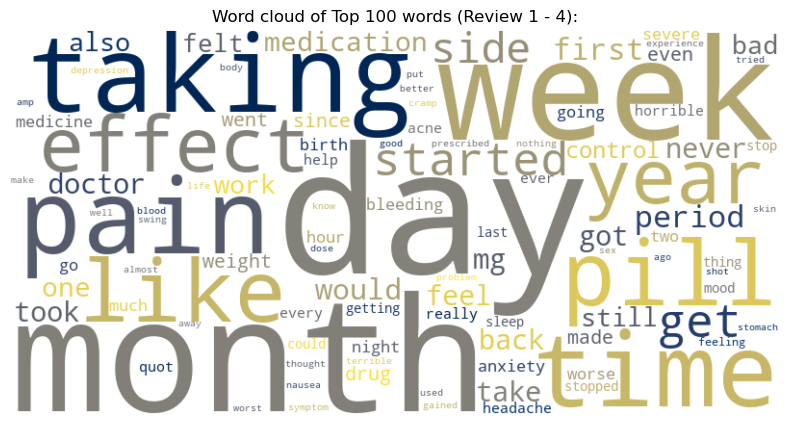

In [11]:
# Get the top 100 words
top_100_bad = dict(bword_counter.most_common(100))

# Generate a word cloud with different font sizes for the top 15 and top 100 words
wordcloud_combined_b = WordCloud(width=800, height=400, background_color="white", max_words=100,
                               prefer_horizontal=1.0, relative_scaling=0.5, colormap = 'cividis').generate_from_frequencies(top_100_bad)

# Display the generated word cloud using matplotlib
plot.figure(figsize=(10, 5))
plot.imshow(wordcloud_combined_b, interpolation="bilinear")
plot.axis("off")
plot.title("Word cloud of Top 100 words (Review 1 - 4):")
plot.show()

# 3.b Word Count and Word Cloud for Review 5 - 7

In [12]:
mwords = ' '.join(meh['review'])  
mtokens = word_tokenize(mwords) 
mword_counter = Counter(mtokens)  

# Get the top 15 words
top_15_meh = mword_counter.most_common(15)

# Create a DataFrame for the top 15 words and their counts
meh_15 = pd.DataFrame(top_15_meh, columns=['Word', 'Count'])
meh_15.index += 1

# Display the top 15 words and their counts in a table format
print("Word count of Top 15 words (Review 5 - 7):")
meh_15

Word count of Top 15 words (Review 5 - 7):


,Word,Count
1,day,15550
2,month,12249
3,week,9539
4,year,9161
5,taking,8905
6,effect,8804
7,side,8417
8,time,8263
9,first,7675
10,period,7591


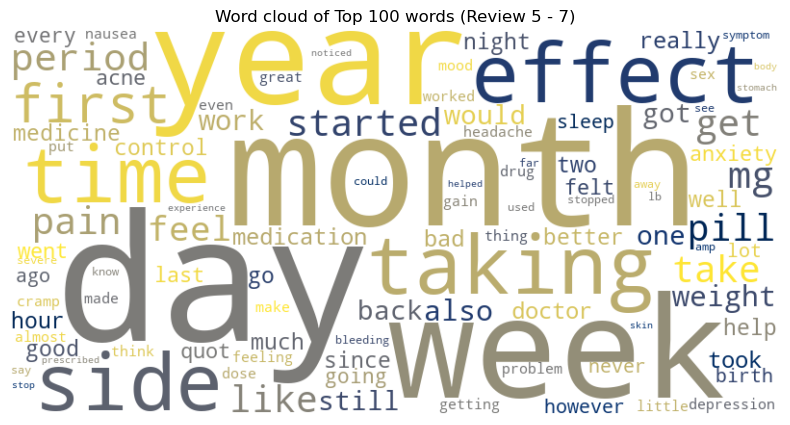

In [13]:
# Get the top 100 words
top_100_meh = dict(mword_counter.most_common(100))

# Generate a word cloud with different font sizes for the top 15 and top 100 words
wordcloud_combined_m= WordCloud(width=800, height=400, background_color="white", max_words=100,
                                   prefer_horizontal=1.0, relative_scaling=0.5, colormap = 'cividis_r').generate_from_frequencies(top_100_meh)

# Display the generated word cloud using matplotlib
plot.figure(figsize=(10, 5))
plot.imshow(wordcloud_combined_m, interpolation="bilinear")
plot.axis("off")
plot.title("Word cloud of Top 100 words (Review 5 - 7)")
plot.show()

# 3.c Word Count and Word Cloud for Review 8 - 10

In [14]:
gwords = ' '.join(good['review'])  
gtokens = word_tokenize(gwords)  
gword_counter = Counter(gtokens)  

# Get the top 15 words
top_15_good = gword_counter.most_common(15)

# Create a DataFrame for the top 15 words and their counts
good_15 = pd.DataFrame(top_15_good, columns=['Word', 'Count'])
good_15.index += 1

# Display the top 15 words and their counts in a table format
print("Word count of Top 15 words (Review 8 - 10):")
good_15

Word count of Top 15 words (Review 8 - 10):


,Word,Count
1,day,57947
2,year,46087
3,month,37821
4,effect,35515
5,side,34061
6,week,33742
7,take,31340
8,time,30505
9,mg,30429
10,taking,29382


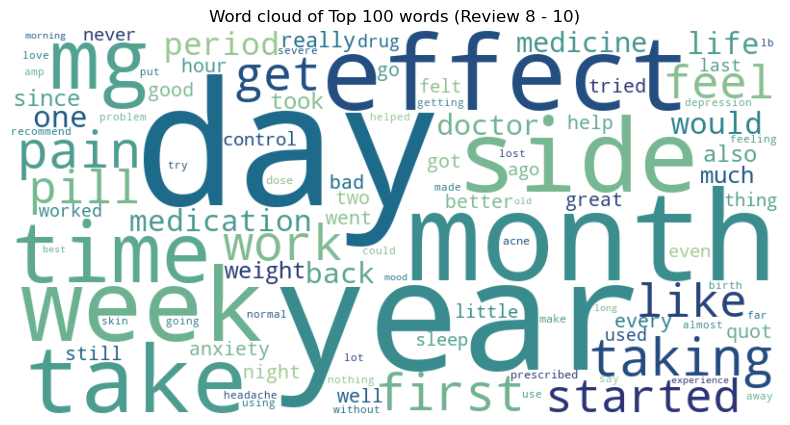

In [15]:
# Get the top 100 words
top_100_good = dict(gword_counter.most_common(100))

# Generate a word cloud with different font sizes for the top 15 and top 100 words
wordcloud_combined_g = WordCloud(width=800, height=400, background_color="white", max_words=100,
                                     prefer_horizontal=1.0, relative_scaling=0.5, colormap = 'crest').generate_from_frequencies(top_100_good)

# Display the generated word cloud using matplotlib
plot.figure(figsize=(10, 5))
plot.imshow(wordcloud_combined_g, interpolation="bilinear")
plot.axis("off")
plot.title("Word cloud of Top 100 words (Review 8 - 10)")
plot.show()

# 4.a Sentiment Analysis for Review 1 - 4

In [16]:
# Add your codes here for running sentiment analysis
bad['polarity'] = bad['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

bad.head()

C:\Users\althe\AppData\Local\Temp\ipykernel_2152\3982356824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['polarity'] = bad['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,polarity
5,155963,Cialis,Benign Prostatic Hyperplasia,nd day mg started work rock hard erection howe...,2.0,"November 28, 2015",43,0.127083
6,165907,Levonorgestrel,Emergency Contraception,pulled cummed bit took plan b hour later took ...,1.0,"March 7, 2017",5,0.111111
8,74811,Keppra,Epilepsy,nothing problem keppera constant shaking arm a...,1.0,"August 9, 2016",11,0.200000
12,191290,Pentasa,Crohn's Disease,crohn resection year ago mostly remission sinc...,4.0,"July 6, 2013",8,-0.177778
13,221320,Dextromethorphan,Cough,little bit lingering cough cold giving much tr...,4.0,"September 7, 2017",1,-0.036574


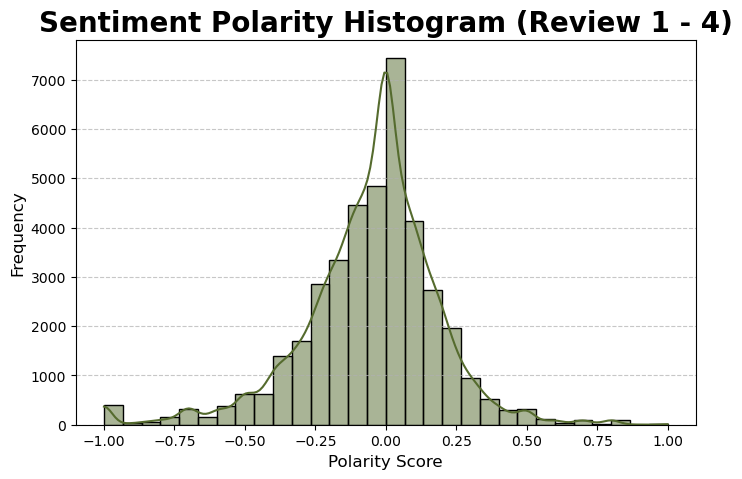

In [17]:
# Add your codes here for histogram
plot.figure(figsize=(8, 5))
sns.histplot(bad['polarity'], bins=30, color='#556B2E', kde=True)
plot.title('Sentiment Polarity Histogram (Review 1 - 4)', fontweight='bold', fontsize=20)
plot.xlabel('Polarity Score', fontsize=12)
plot.ylabel('Frequency', fontsize=12)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.show()

# 4.b Sentiment Analysis for Review 5 - 7

In [18]:
# Add your codes here for running sentiment analysis

meh['polarity'] = meh['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

meh.head()

C:\Users\althe\AppData\Local\Temp\ipykernel_2152\333548924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meh['polarity'] = meh['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,polarity
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0,"December 14, 2009",17,0.159790
25,51215,Azithromycin,Chlamydia Infection,prescribed one dose course one day took pill m...,7.0,"December 14, 2015",7,0.311111
28,132258,Ativan,Panic Disorde,honestly taking ativan year mg twice daily hel...,6.0,"June 1, 2015",47,0.600000
43,12056,Metaxalone,Muscle Spasm,taking medicine due lower back trouble first t...,5.0,"June 4, 2014",55,0.145000
49,153093,Doxycycline,Urinary Tract Infection,battled nasty uti month amp went different ant...,7.0,"July 6, 2016",44,-0.180612


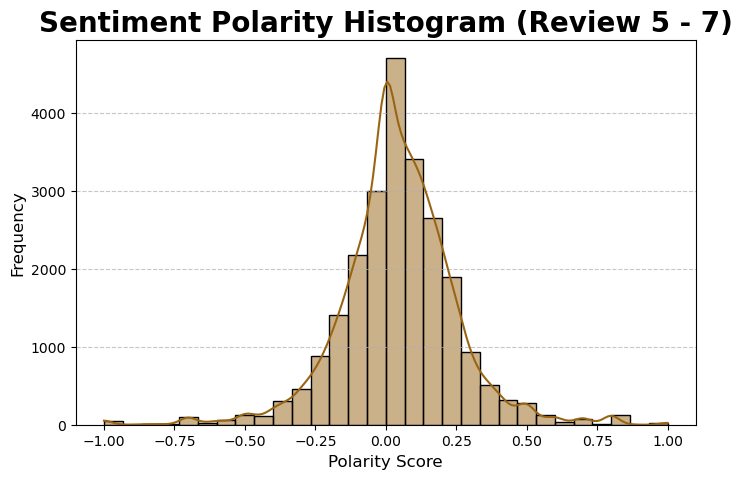

In [19]:
# Add your codes here for histogram

plot.figure(figsize=(8, 5))
sns.histplot(meh['polarity'], bins=30, color='#996514', kde=True)
plot.title('Sentiment Polarity Histogram (Review 5 - 7)', fontweight='bold', fontsize=20)
plot.xlabel('Polarity Score', fontsize=12)
plot.ylabel('Frequency', fontsize=12)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.show()

# 4.c Sentiment Analysis for Review 8 - 10

In [20]:
# Add your codes here for running sentiment analysis
good['polarity'] = good['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

good.head()

C:\Users\althe\AppData\Local\Temp\ipykernel_2152\3027276344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['polarity'] = good['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,polarity
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9.0,"May 20, 2012",27,0.000000
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8.0,"April 27, 2010",192,0.188021
3,138000,Ortho Evra,Birth Control,first time using form birth control glad went ...,8.0,"November 3, 2015",10,0.262500
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0,"November 27, 2016",37,0.163333
7,102654,Aripiprazole,Bipolar Disorde,abilify changed life hope zoloft clonidine fir...,10.0,"March 14, 2015",32,0.079808


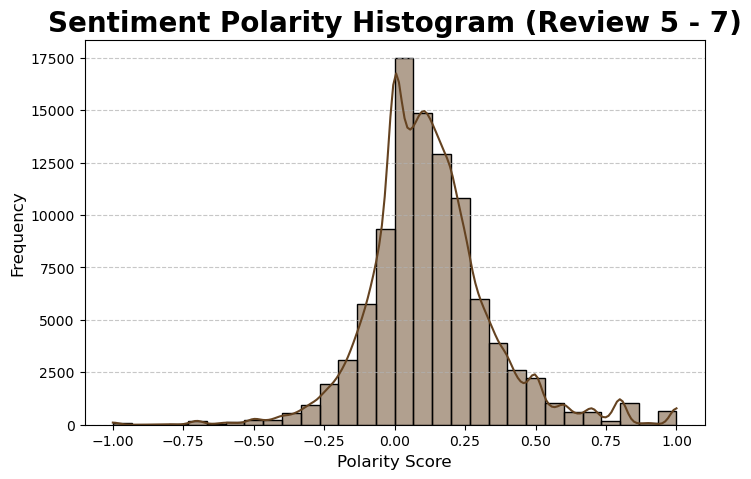

In [21]:
# Add your codes here for histogram

plot.figure(figsize=(8, 5))
sns.histplot(good['polarity'], bins=30, color='#654321', kde=True)
plot.title('Sentiment Polarity Histogram (Review 5 - 7)', fontweight='bold', fontsize=20)
plot.xlabel('Polarity Score', fontsize=12)
plot.ylabel('Frequency', fontsize=12)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.show()

# 5. Insights

**ADD YOUR INSIGHTS**

Gathering reviews or feedback has always been one of the most effective ways to ensure the quality of a product, event, movie, or anything. It gathers thoughts, suggestions, and effects so the creator can focus on improving that aspect or be informed about something they might have overlooked. The dataset focuses on reviews of different drugs and a rating system. It's essential not just to pharmaceutical companies but to the consumers. Hence, they know what's effective and wouldn't cause more harm.

The data has been sorted into groups based on their rating, one to four being the bad reviews, five to seven being the okay reviews, and eight above being the good reviews. The act of grouping these reviews helps us to see patterns that would help us identify what are some keywords that reviews have leading to that rating. It also removes some saturation, as those with higher ratings would have more positive results, which can overshadow important insights from the lower-rated drugs.

From the word count and cloud, all three groups have words regarding time as their top-used words. That gives people a context of the duration of effects or how effective the drugs are. Following that, the three groups would vary. The low-rated drugs have the word pain relatively high, indicating it's somehow affecting the feeling of pain. Following pain, words such as 'effect,' 'started,' and 'get' appear, which might indicate that drugs are causing pain. Still, it can only be quite determined once we see the polarity of these reviews. For the middle-rated ones, pain comes up later, meaning there are fewer occurrences of it. The words seem more neutral but are still similar to the previous ones. In the good reviews, we don't see the word pain at all, and the word 'work' appears, hinting that these drugs were more effective.

Looking at the polarity of these three groups, we use a histogram to visualize the dataset better. The drugs with lower reviews are more skewed on the rights; there's more substance on the negative side, even having a small peak at rating 1; these drugs were not effective at all, peaking at a more neutral score. As we look at the middle-rated drugs, the reviews turn more positive. While negatives are still present, the graph starts to skew slightly on the left, indicating that this group is more neutral. This leads to the last group: drugs that are rated eight or higher are skewed to the left. The reviews are primarily positive, as one would expect. However, it still contains some neutral reviews, but it can confidently accept that these drugs are good.